# Práctica 7 Montículos
Juan C. Agui  
ICAI IMAT Abril 2024

Hagamos unos import

In [15]:
import random
import time 
import math
import sys
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import datetime 
import jdc

## Definición Clases básicas

## Clase Nodo

In [16]:

# definición de clase nodo, con algunas funciones de utilidad...
class Node():
    def __init__(self,  key=None, value=None):
        # pointer to parent
        self.parent  = None 
        # pointer to left child  
        self.left    = None 
        # pointer to right child
        self.right   = None 
        # key that identifies the node
        self.key     = key    
        # additional data
        self.value    = value   # additional data
    
    def __str__(self):
        return f'Node {self.key=}, {self.value=} id={id(self)}'

    def __repr__(self):
        return f'Node key={self.key}'

    def __lt__(self,other):
        return self.key < other.key
    
    def show(self):
        parentId = self.parent if self.parent else "N/A"
        leftId = self.left.key if self.left else "N/A"
        rightId = self.right.key if self.right else "N/A"
        return f"Node Id={self.key}  Parent={parentId} Left={leftId} Right={rightId}, Height={self.height()}"
    
    def isLeaf(self):
        if self.left or self.right:
            return False
        else:
            return True
    
    def isOrphan(self):
        return self.parent is None
    
    def isLeftChild(self):
        if self.isOrphan():
            return False
        
        if self.parent.left == self:
            return True
        else:
            return False
    
    def isRightChild(self):
        if self.isOrphan():
            return False
            
        if self.parent.right == self: 
            return True
        else:
            return False
        
    def height(self):
        if self.isLeaf():
            return 0
        else:
            l_height = self.left.height() if self.left else 0
            r_height = self.right.height() if self.right else 0
            return 1 + max(l_height, r_height)
        
    # retorna el skew o desquilibrio de un nodo, mirando a la altura de sus hijos...
    def skew(self):
        l_height = self.left.height()  + 1 if self.left  else 0
        r_height = self.right.height() + 1 if self.right else 0
        return r_height - l_height
    
    def connectAsLeftChildOfNode(self,parent):
        """ sets self as left child of parent"""
        self.parent = parent
        parent.left = self
        
    def connectAsRightChildOfNode(self,parent):
        """ sets self as right child of parent"""
        self.parent = parent
        parent.right = self

print ("Node class updated")

Node class updated


## Clase BST, Binary Search Tree
Aquí definimos lo básico del BST y un método plot que nos permite visualizarlo fácilmente.... Luego lo vamos enriqueciendo progresivamente en celdas posteriores

In [17]:
      
class BST():
    def __init__(self, rootNode=None):
        self.rootNode = rootNode
    
    def __str__(self):
        """   printable info of a tree  """
        return f'Tree with root Node key = {self.rootNode.key} and Height= {self.height()} Size = {self.size()} Skew = {self.skew()}'
        
    def height(self):
        """   returns height of a tree, 0  if empty  """
        if self.rootNode:
            return self.rootNode.height()
        else:
            return 0
        
    def skew(self):
        if self.rootNode is None:
            return 0
        else:
            return self.rootNode.skew()
    

    def size(self):
        """ Number of nodes in tree, including root """
        if self.rootNode:
            leftSize = BST(self.rootNode.left).size()   if self.rootNode.left else 0
            rightSize = BST(self.rootNode.right).size() if self.rootNode.right else 0
            return leftSize + rightSize + 1    
        else:
            return 0        

    def plot(self,header=None):

        if header is None:
            header = self.__str__()
            
        fig, ax = plt.subplots(1, 1, figsize=(10, 15))

        ax.set_aspect('equal')

        height = self.height()
        width = 2**(self.height()+1 )
        ratio = width/height

        nodeRadius = 0.12*ratio

        ax.set_xlim(-(width//2 - 1)*1.1, (width//2)*1.1)
        ax.set_ylim((height+2)*ratio, -ratio)
        
        
        def addNode(aNode, origin):
            if origin is None:
                origin = (0, 0)
            hspace = 2**(aNode.height()-1)


            if aNode.left:
                leftChildOrigin = (origin[0]-hspace, (origin[1]+ratio))
                line = lines.Line2D([origin[0], leftChildOrigin[0]], [
                                    origin[1], leftChildOrigin[1]], lw=1, color='black', axes=ax)
                ax.add_line(line)
                addNode(aNode.left, leftChildOrigin)
            if aNode.right:
                rightChildOrigin = (origin[0]+hspace,(origin[1]+ratio))
                line = lines.Line2D([origin[0], rightChildOrigin[0]], [
                                    origin[1], rightChildOrigin[1]], lw=1, color='black', axes=ax)
                ax.add_line(line)
                addNode(aNode.right, rightChildOrigin)
            color = getattr(aNode,'color',"black")
            if not isinstance(color,str):
                color = color.name.lower()
            ax.add_patch(plt.Circle(origin, nodeRadius,
                         color=color, ec='r', fill=True))
            plt.text(origin[0], origin[1]-1.25*nodeRadius, f"{aNode.key}")

        addNode(self.rootNode, (0, 1))

        ax.set_title(header)
        plt.show()
        
print (f"Classes redefined at time {datetime.datetime.now()}")

Classes redefined at time 2024-04-16 08:03:04.345224


## Heapify and buildHeap

In [18]:
def     heapify(arr, N, i, TRACE=False):
    largest = i  # Initialize largest as root
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2

    if TRACE: print (f"Heapifying {arr} at {i} position")

    # See if left child of root exists and is
    # greater than root
    if l < N and arr[largest] < arr[l]:
        largest = l

    # See if right child of root exists and is
    # greater than root
    if r < N and arr[largest] < arr[r]:
        largest = r

    # Change root, if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
        if TRACE: print (f"Swapping {largest} with {i} to {arr} Call Heapify  at {largest}")
                         
        # Heapify the root.
        heapify(arr, N, largest,TRACE=TRACE)
        


Build Heap

In [19]:
def buildHeap(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):                # empieza en el centro-izquierda
        heapify(arr, n, i) 
    return 

Lets test it...

In [20]:
size = 20
arr = [ random.randint(0,100) for _ in range(size)]
print (f"Original array is {arr}")
buildHeap(arr)
print (f"heapified array is {arr}")

Original array is [50, 82, 46, 71, 73, 87, 47, 23, 66, 86, 10, 26, 67, 43, 21, 70, 48, 38, 58, 15]
heapified array is [87, 86, 67, 71, 82, 50, 47, 70, 66, 73, 10, 26, 46, 43, 21, 23, 48, 38, 58, 15]


Daros cuenta que la lista está sólo aproximadamente ordenada. NO lo está, pero cumple la condición de montículo...

In [21]:
# Lets build a tree to show the heap
def builtHeapTree(arr):
    
    def addChildren(node: Node, index, arr):
        left_index = 2* index + 1
        right_index = 2* index + 2
        if left_index < len(arr):
            lChild = Node(arr[left_index])
            lChild.connectAsLeftChildOfNode(node)
            addChildren(lChild, left_index, arr)
        if right_index < len(arr):
            rChild = Node(arr[right_index])
            rChild.connectAsRightChildOfNode(node)
            addChildren(rChild, right_index, arr)
            
    rNode = Node(arr[0])
    tree = BST(rNode)
    addChildren(rNode,0,arr)
    return tree    

Lets doit !!!

[87, 86, 67, 71, 82, 50, 47, 70, 66, 73, 10, 26, 46, 43, 21, 23, 48, 38, 58, 15]


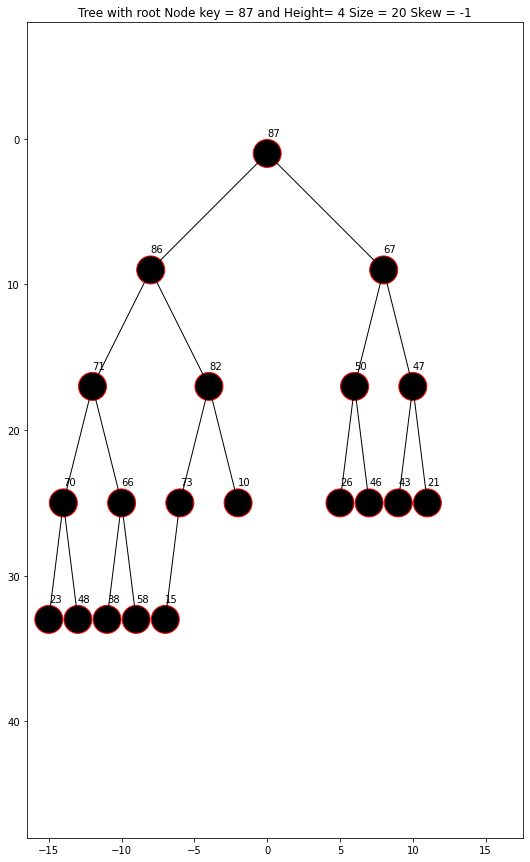

In [22]:
tree = builtHeapTree(arr)
print (arr)
tree.plot()

Podéis ver que está balanceado, pero no es completo... 

## Lets implement a Heap Sort...

In [23]:
def heapSort(arr):
    N = len(arr)

    # Build a maxheap.
    buildHeap(arr)

    # One by one extract elements
    for i in range(N-1, 0, -1):                      # empezando por el último, decreciendo
        arr[i], arr[0] = arr[0], arr[i]              # swap el i con el 0
        heapify(arr, i, 0)                           # heapify [0: i-1], empezando en 0

test it...

In [24]:
print (f"Heap is {arr}, sorting...")
heapSort(arr)
print (f"sorted array is {arr}")

Heap is [87, 86, 67, 71, 82, 50, 47, 70, 66, 73, 10, 26, 46, 43, 21, 23, 48, 38, 58, 15], sorting...
sorted array is [10, 15, 21, 23, 26, 38, 43, 46, 47, 48, 50, 58, 66, 67, 70, 71, 73, 82, 86, 87]


# Speed Test
Lets test up to 1 Million mumbers, measure time, and plot time vs N*log(N) where N is the array size

 Heap sort for size 1000 worked fine took 0.011505010000000482
 Heap sort for size 1500 worked fine took 0.014813267000000963
 Heap sort for size 2250 worked fine took 0.02386994199999748
 Heap sort for size 3375 worked fine took 0.03738415899999836
 Heap sort for size 5062 worked fine took 0.06135128300000048
 Heap sort for size 7593 worked fine took 0.10640004200000419
 Heap sort for size 11389 worked fine took 0.09690606800000268
 Heap sort for size 17083 worked fine took 0.16630579299999937
 Heap sort for size 25624 worked fine took 0.2500621540000054
 Heap sort for size 38436 worked fine took 0.44443270400000046
 Heap sort for size 57654 worked fine took 0.6577087929999976
 Heap sort for size 86481 worked fine took 1.0862096769999994
 Heap sort for size 129721 worked fine took 1.5446611019999992
 Heap sort for size 194581 worked fine took 2.488731423999994
 Heap sort for size 291871 worked fine took 3.810277531000004
 Heap sort for size 437806 worked fine took 6.066949226999995
 H

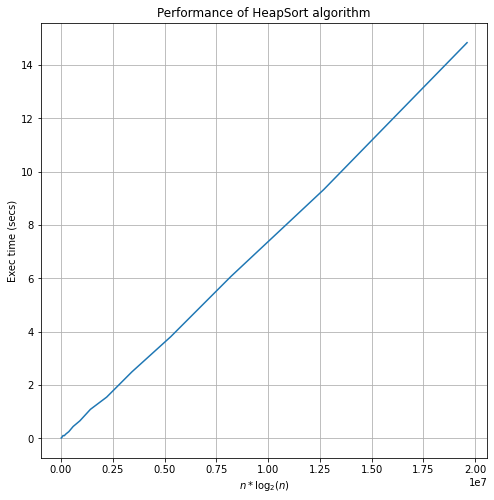

In [70]:
size = 1000
sizes = []
times = []
while size < 10**6:

    arr = [ random.random() for _ in range(size)]
    arr_sorted = arr.copy()
    arr_sorted.sort()

    # Function call
    t0 = time.process_time()
    heapSort(arr)
    dt = time.process_time() - t0
    if arr == arr_sorted:
        print (f" Heap sort for size {len(arr)} worked fine took {dt}")
    else:
        print (f" Heap sort for size {len(arr)} worked Bad")
    sizes.append(size)
    times.append(dt)
    size = int(size * 1.5)
    
# plotting time vs nlogN
nlogN = [size*math.log2(size) for size in sizes]

fig, ax = plt.subplots(1,1,figsize=(8,8) )
ax.plot(nlogN, times)
ax.set_xlabel("$n * \log_2 (n)$")
ax.set_ylabel("Exec time (secs)")
ax.set_title("Performance of HeapSort algorithm")
ax.grid()
plt.show()

# Is that linear !!!

-----
# Extra, Extra!!!: A priority queue implementation with heaps
we need to implement a pqueue Class, with  push and pop. Push is an insert method, and pop is a remove first method.

we need to always keep the heap condition...

Primero implementemos  el heapUp de una array, de longitud N, empezando en i, que es clave para que el insert sea eficaz, reconstruyendo sólo lo necesario...

In [53]:
def heapUp(arr,i):
    """ flota el elemento i hasta que la posición sea correcta en el monticulo"""
    
    while i > 0:                                            # stop at root, or first element
        p_index = (i-1)//2
        if arr[p_index] < arr[i]:                           # if less than parent, 
            arr[p_index], arr[i] = arr[i],arr[p_index]      # exchange
            i = p_index                                     # chek upwards ( I could be recursive here ... )
        else:                                               # no need, get out of the loop
            break
    return    

[70, 35, 55, 30, 20, 50]
[70, 35, 55, 30, 20, 50]
[70, 35, 55, 30, 20, 50, 100]
[100, 35, 70, 30, 20, 50, 55]


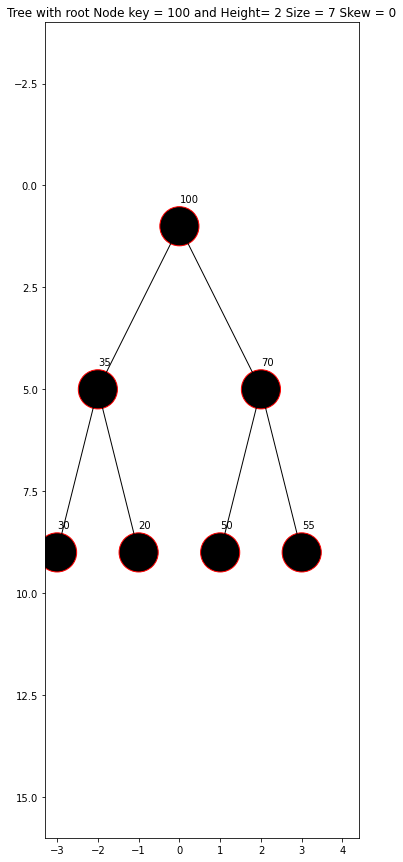

In [54]:
# lets test HeapUp
arr =[70,35,55,30,20,50]
print (arr)
buildHeap(arr)
print (arr)
arr.append(100)
print (arr)
heapUp(arr,len(arr)-1)
print (arr)
tree = builtHeapTree(arr)
tree.plot()

## Now lets go for the pqueue()

In [61]:
class pqueue():
    def __init__(self) -> None:
        self.arr = []                # initially it is empty, NO max size
         
    def size(self):
        """ retorna el número de elementos en la cola"""
        return len(self.arr)
    
    def isEmpty(self):
        return self.size() == 0
    
    def __str__(self) -> str:
        return f"Pq of size {self.size()} data is {self.arr}"
    
    def push(self,items):
        """ 
            Inserta los elementos de la colección  o elemento items en la cola
            mantiene la condición de heap, para responder a pop/peek en O(1)
            (push accepta tanto elementos como colecciones de ellos)
        """
    
        # Añade los datos...
        if isinstance(items, list):                      
            self.arr.extend(items)
            count = len(items)
        else:
            self.arr.append(items)
            count = 1
            
        # inser and heap up all inserted...                          
        # heap up all the inserted items
        for index in range(len(self.arr)- count,len(self.arr)):
            heapUp(self.arr,index)
        return
     
    def pop(self):
        """
            pop, me da el elemento de mayor prioridad ( el máximo )    eliminándolo de la lista
            mantiene la condición de heap
        """
        if self.size() > 0:
            self.arr[-1], self.arr[0] = self.arr[0], self.arr[-1]              # swap el último con el primero
            item = self.arr.pop(-1)                                            # Return el último y eliminalo de los datos
            heapify(self.arr, len(self.arr), 0)                                # restaura la condicion de heap, desde el ppio
        else:
            raise Exception("Empty Queue")
        return item
    
    def peek(self):
        """ retorna el elemento de máxima prioridad, sin eliminarlo de la lista
            None if empty
        """
        if self.size() > 0:
            return self.arr[0]    
        else:
            return None    
            
    def showTree(self):
        """ 
            visualiza el heap interno de la cola como un tree binario
        """
        builtHeapTree(self.arr).plot()
    

### **Test time**

0, True
Pq of size 2 data is [4, 1]
pq pop is 4
pushing collection [29, 80, 16, 41, 62, 16, 16, 4, 33, 31, 42, 11, 30, 99, 82, 20, 33, 13, 59, 26, 15, 44, 4, 51, 36]
Visualizing as tree


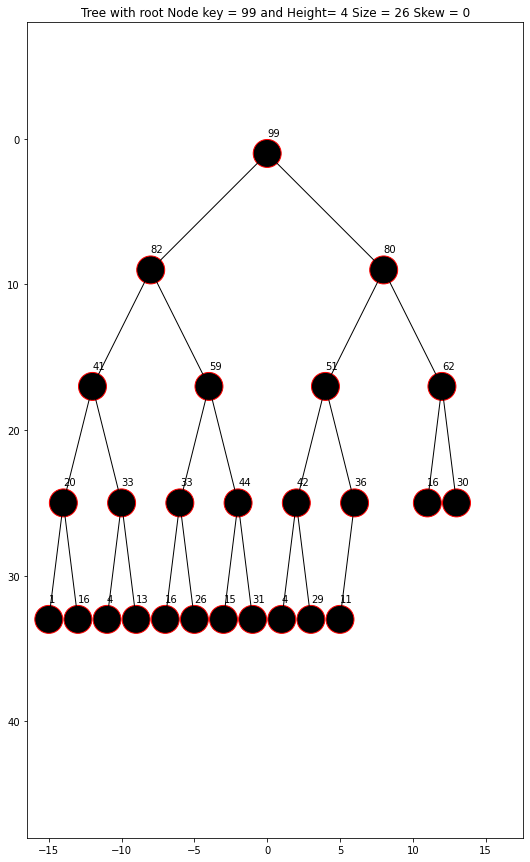

Now pop till empty
popping value 99, size of queue after is  25
popping value 82, size of queue after is  24
popping value 80, size of queue after is  23
popping value 62, size of queue after is  22
popping value 59, size of queue after is  21
popping value 51, size of queue after is  20
popping value 44, size of queue after is  19
popping value 42, size of queue after is  18
popping value 41, size of queue after is  17
popping value 36, size of queue after is  16
popping value 33, size of queue after is  15
popping value 33, size of queue after is  14
popping value 31, size of queue after is  13
popping value 30, size of queue after is  12
popping value 29, size of queue after is  11
popping value 26, size of queue after is  10
popping value 20, size of queue after is  9
popping value 16, size of queue after is  8
popping value 16, size of queue after is  7
popping value 16, size of queue after is  6
popping value 15, size of queue after is  5
popping value 13, size of queue after is 

In [67]:
pq = pqueue()
print (f"{pq.size()}, {pq.isEmpty()}")
pq.push(1)

pq.push(4)
print (pq)
print (f"pq pop is {pq.pop()}")

col = [random.randint(0,100) for _ in range(25)]
print (f"pushing collection {col}")
pq.push(col)
print (f"Visualizing as tree")
pq.showTree()
print ("Now pop till empty")
while not pq.isEmpty():
    print (f"popping value {pq.pop()}, size of queue after is  {pq.size()}")
print ("Thats all folks !")

### lets look at the pqueue interface
No hará mención a los montículos  ( diferencia entre API ( queue ) y la estructura de datos subyaciente (heaps)

In [68]:
help(pqueue)

Help on class pqueue in module __main__:

class pqueue(builtins.object)
 |  pqueue() -> None
 |  
 |  Methods defined here:
 |  
 |  __init__(self) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self) -> str
 |      Return str(self).
 |  
 |  isEmpty(self)
 |  
 |  peek(self)
 |      retorna el elemento de máxima prioridad, sin eliminarlo de la lista
 |      None if empty
 |  
 |  pop(self)
 |      pop, me da el elemento de mayor prioridad ( el máximo )    eliminándolo de la lista
 |      mantiene la condición de heap
 |  
 |  push(self, items)
 |      Inserta los elementos de la colección  o elemento items en la cola
 |      mantiene la condición de heap, para responder a pop/peek en O(1)
 |      (push accepta tanto elementos como colecciones de ellos)
 |  
 |  showTree(self)
 |      visualiza el heap interno de la cola como un tree binario
 |  
 |  size(self)
 |      retorna el número de elementos en la cola
 |  
 |  ------------------